## 1. Introduction 
This project is Assigment 3 (Critical Analysis Task) of Data Science / COMP6200. Below the code of data scientist which was fired from the company, my code is seprated and starts in next chapter. 

## 2. Legacy Code from Previous Data Scientist

The following code was written by a previous data scientist. 
<br> It is retained here for reference but is not directly used in the current analysis.

In [191]:
import pandas
import math

<br> Importing the library pandas for reading the datasent and math

In [194]:
df = pandas.read_csv('company_directorships.csv')
df.software_background = df.software_background.map(lambda x: x == 't')
df.sample(5)

,company_name,cikcode,director_name,software_background,start_date,end_date
2075,CATO CORP,18255,THOMAS B. HENSON,False,2011-04-08,2024-04-03
7888,MASTEC INC,15615,ERNEST CSIZAR,False,2011-03-23,2011-03-23
12311,"United Airlines Holdings, Inc.",100517,OSCAR MUNOZ,False,2016-04-29,2018-04-23
1736,BUTLER NATIONAL CORP,15847,DAVID B. HAYDEN,True,2001-11-15,2024-09-16
8589,NATIONAL RESEARCH CORP,70487,PENNY A. WHEELER,False,2021-06-03,2024-04-11


<br> Reading dataset into "df" and viewing the 5 rows of the dataset.

<br> In the next step, read file director-details and used function most_common to find most common values in column using mode and used this function for gender column in next line of code. Choosed the highest age directors with sum of compensations and in the end transformed the compensation column into log base because the values were big.

In [198]:
compensation_and_demographics_raw = pandas.read_csv('director-details.csv')
compensation_and_demographics_raw['NAME'] = compensation_and_demographics_raw.name.str.upper()

def most_common(series):
    mode_values = series.mode()
    if len(mode_values) > 0:
        return mode_values[0]
    return None
    
compensation_and_demographics = pandas.DataFrame({
    'age': compensation_and_demographics_raw.groupby('NAME').age.max(),
    'compensation': compensation_and_demographics_raw.groupby('NAME').compensation.sum(),
    'gender': compensation_and_demographics_raw.groupby('NAME').gender.agg(most_common)
})
compensation_and_demographics['log_compensation'] = (1 + compensation_and_demographics.compensation).map(math.log10)
compensation_and_demographics

,age,compensation,gender,log_compensation
NAME,,,,
A. CATHERINE NGO,64,1006154,female,6.002665
A. EUGENE WASHINGTON,70,324871,male,5.511712
A. F. PETROCELLI,80,47000,male,4.672107
A. FARAZ ABBASI,52,113631,male,5.055501
A. LARRY CHAPMAN,78,259500,male,5.414139
...,...,...,...,...
ZACKARY IRANI,58,360103,male,5.556428
ZAHID AFZAL,62,0,male,0.000000
ZENA SRIVATSA ARNOLD,46,189960,female,5.278664


In [199]:
compensation_and_demographics.gender.value_counts(dropna=False)

gender
male       3850
female     1550
None         19
unknown       2
Name: count, dtype: int64

<br> Viewing the unique values of gender column.

In [203]:
directorship_counts = df.groupby('director_name').company_name.nunique().sort_values()
directorship_counts

director_name
A CHARLENE SULLIVAN, PH.D.     1
MICHAEL L. KUTA                1
MICHAEL L. LARUSSO             1
MICHAEL L. MILLER              1
MICHAEL L. OWENS               1
                              ..
MARTIN L. FLANAGAN            13
ANN BARNETT STERN             13
TERESA M. RESSEL              13
BRUCE L. CROCKETT             13
ALBERT R. DOWDEN              14
Name: company_name, Length: 11827, dtype: int64

<br> Counting the companies directers names under multiply compnaies.

<Axes: xlabel='company_name'>

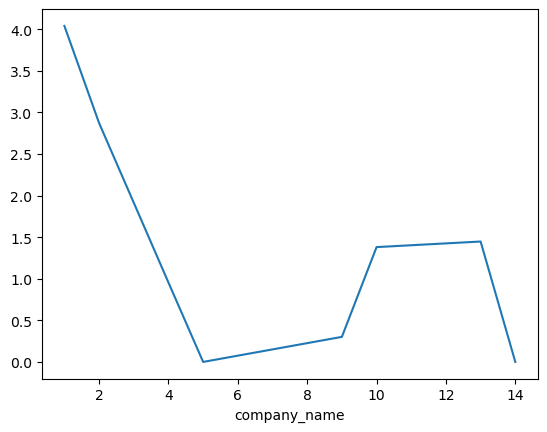

In [206]:
directorship_counts.value_counts().sort_index().map(math.log10).plot()

<br> Plotting the graph where how many companies have under directers or one person, and most have 1 compnaies and between 10 and 13.

In [209]:
import networkx
import networkx.algorithms
graph = networkx.Graph()

<br> Imported network packege.

In [212]:
people = []
companies = []
for company_name, director_name in zip(df.company_name, df.director_name):
    graph.add_edge(company_name, director_name)
    people.append(director_name)
    companies.append(company_name)

<br> Created the loop for graph to put to every directors name into edge of the graph.

In [215]:
biggest_connected_graph = graph.subgraph(list(networkx.connected_components(graph))[0])

In [217]:
%%time
centrality = pandas.DataFrame({
    'eigen': pandas.Series(networkx.eigenvector_centrality(biggest_connected_graph)),
    'degree': pandas.Series(networkx.algorithms.degree_centrality(biggest_connected_graph)),
})
centrality['is_person'] = centrality.index.map(lambda x: x in people)

CPU times: total: 2.5 s
Wall time: 2.53 s


<br> First used %% time to measure exucation time then Identified nodes connected to other well-connected nodes — captured influences,
<br> and measured how many direct connections each node.

In [219]:
people_df = centrality[centrality.is_person].merge(compensation_and_demographics, left_index=True, right_index=True)

In [220]:
people_df.sort_values('eigen', ascending=False)

,eigen,degree,is_person,age,compensation,gender,log_compensation
ELIZABETH KRENTZMAN,1.024389e-01,0.001585,True,65,3408245,female,6.532531
CAROL DECKBAR,1.024389e-01,0.001585,True,62,43263,female,4.636127
ELI JONES,1.024389e-01,0.001585,True,63,3063255,male,6.486183
DOUGLAS SHARP,1.024389e-01,0.001585,True,50,0,male,0.000000
"JAMES ""JIM"" LIDDY",1.024389e-01,0.001585,True,65,27531,male,4.439838
...,...,...,...,...,...,...,...
JOHN J. GEBBIA,8.400282e-35,0.000122,True,86,120000,male,5.079185
ANDREW S. BORODACH,8.342633e-35,0.000122,True,56,0,male,0.000000
LAWRENCE A. KOBRIN,8.342633e-35,0.000122,True,91,30356,male,4.482259
NANCY J. FLOYD PRUE,8.342633e-35,0.000122,True,70,50356,female,4.702060


<br> Sortred the table of people by eigenvector centrality, to show the most influential directors.

In [222]:
df[df.director_name == 'ELIZABETH KRENTZMAN']

,company_name,cikcode,director_name,software_background,start_date,end_date
6297,Invesco Advantage Municipal Income Trust II,908993,ELIZABETH KRENTZMAN,False,2021-06-22,2024-07-02
6352,Invesco Bond Fund,5094,ELIZABETH KRENTZMAN,False,2021-06-22,2024-07-02
6407,Invesco California Value Municipal Income Trust,895531,ELIZABETH KRENTZMAN,False,2021-06-22,2024-07-02
6462,Invesco High Income Trust II,846671,ELIZABETH KRENTZMAN,False,2021-06-22,2024-07-02
6512,Invesco Municipal Income Opportunities Trust,835333,ELIZABETH KRENTZMAN,False,2021-06-22,2024-07-02
6546,Invesco Municipal Opportunity Trust,884152,ELIZABETH KRENTZMAN,False,2021-06-22,2024-07-02
6601,Invesco Municipal Trust,877463,ELIZABETH KRENTZMAN,False,2021-06-22,2024-07-02
6656,Invesco Pennsylvania Value Municipal Income Trust,895528,ELIZABETH KRENTZMAN,False,2021-06-22,2024-07-02
6706,Invesco Quality Municipal Income Trust,885125,ELIZABETH KRENTZMAN,False,2021-06-22,2024-07-02
6740,Invesco Senior Income Trust,1059386,ELIZABETH KRENTZMAN,False,2021-06-22,2024-07-02


<br> Sorted most influention director by name Elizabeth Krentzman

In [224]:
import sklearn.cluster

In [225]:
import sklearn.preprocessing
robust_scaler = sklearn.preprocessing.RobustScaler()
age_and_demographics_scaled = robust_scaler.fit_transform(people_df[['age', 'log_compensation', 'degree', 'eigen']])


<br> Storing the scaled output to variable named age_and_demgoraphics.

In [227]:
dbscan = sklearn.cluster.DBSCAN(eps=0.4)
people_df['cluster_id'] = dbscan.fit_predict(age_and_demographics_scaled)
people_df.cluster_id.value_counts()

cluster_id
 1    3117
 0     385
 2     109
-1      72
 3      24
 4      19
 7       8
 6       5
 5       3
Name: count, dtype: int64

<br> Performed density-based clustering on scaled demographic data.

<Axes: xlabel='age', ylabel='log_compensation'>

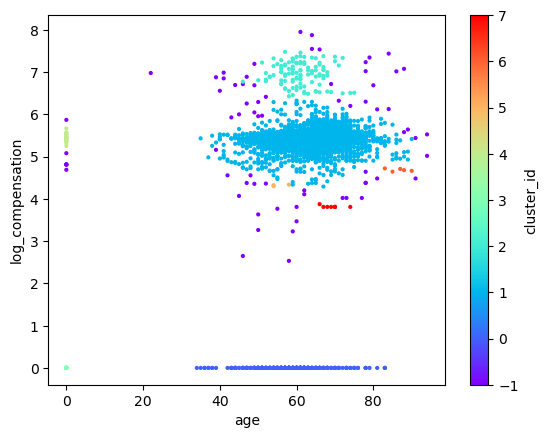

In [229]:
people_df.plot.scatter(x='age', y='log_compensation', c='cluster_id', cmap="rainbow", s=4)

In [230]:
people_df.loc['ELIZABETH KRENTZMAN']

eigen               0.102439
degree              0.001585
is_person               True
age                       65
compensation         3408245
gender                female
log_compensation    6.532531
cluster_id                 2
Name: ELIZABETH KRENTZMAN, dtype: object

<br> In conlusion, data scientist tried to find most influential director using centrality based on the age, gender, companies quantities and compensation, by the result it was Elizabeth Krentzman from the dataset who was most influention person and have possiblity to buy the company.

## 3. Tasks (Centrality extension)

<br> In this chapter, I will use centrality measure which was not used in this project by previous analyst and explain which centrality measure used old analyst and dicsuss what is meaning of using these with these dataset.

In [463]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
df = pd.read_csv("director-details.csv")
df['NAME'] = df['name'].str.upper()
df

,id,url,name,age,role,compensation,source_excerpt,created_at,gender,NAME
0,2,https://www.sec.gov/Archives/edgar/data/6281/0...,Vincent Roche,62,Chief Executive Officer and Chair of the Board...,0,"Vincent Roche, 62, Director since: 2013, Chief...",2025-05-16 14:46:58.618229,NaN,VINCENT ROCHE
1,3,https://www.sec.gov/Archives/edgar/data/6281/0...,James A. Champy,80,Presiding Director,364861,"James A. Champy, 80, Director since: 2003, Pre...",2025-05-16 14:46:58.618229,NaN,JAMES A. CHAMPY
2,4,https://www.sec.gov/Archives/edgar/data/6281/0...,André Andonian,60,Director,195090,"André Andonian, 60, Director since: 2022, Comm...",2025-05-16 14:46:58.618229,NaN,ANDRÉ ANDONIAN
3,5,https://www.sec.gov/Archives/edgar/data/6281/0...,Anantha P. Chandrakasan,54,Director,328611,"Anantha P. Chandrakasan, 54, Director since: 2...",2025-05-16 14:46:58.618229,NaN,ANANTHA P. CHANDRAKASAN
4,6,https://www.sec.gov/Archives/edgar/data/6281/0...,Edward H. Frank,66,Director,341307,"Edward H. Frank, 66, Director since: 2014, Com...",2025-05-16 14:46:58.618229,NaN,EDWARD H. FRANK
...,...,...,...,...,...,...,...,...,...,...
5905,5907,https://www.sec.gov/Archives/edgar/data/730272...,"Konstantin Konstantinov, Ph.D.",67,Director,301651,"Konstantin Konstantinov, Ph.D., Director, Chie...",2025-05-16 16:37:44.478036,male,"KONSTANTIN KONSTANTINOV, PH.D."
5906,5908,https://www.sec.gov/Archives/edgar/data/730272...,"Martin D. Madaus, D.V.M., Ph.D.",65,Director,316984,"Martin D. Madaus, D.V.M., Ph.D., Director, Sen...",2025-05-16 16:37:44.478036,male,"MARTIN D. MADAUS, D.V.M., PH.D."
5907,5909,https://www.sec.gov/Archives/edgar/data/730272...,"Rohin Mhatre, Ph.D.",60,Director,306651,"Rohin Mhatre, Ph.D., Director, Executive Vice ...",2025-05-16 16:37:44.478036,male,"ROHIN MHATRE, PH.D."
5908,5910,https://www.sec.gov/Archives/edgar/data/730272...,Glenn P. Muir,66,Director,338318,"Glenn P. Muir, Director, Retired Chief Financi...",2025-05-16 16:37:44.478036,male,GLENN P. MUIR


In [426]:
def most_common(series):
    mode_values = series.mode()
    return mode_values.iloc[0] if not mode_values.empty else None

<br> This funtion return most common the value based on the mode.

In [429]:
compensation_df = pd.DataFrame({
    'age': df.groupby('NAME')['age'].max(),
    'compensation': df.groupby('NAME')['compensation'].sum(),
    'gender': df.groupby('NAME')['gender'].agg(most_common)
})

In [431]:
compensation_df['log_compensation'] = (1 + compensation_df['compensation']).apply(lambda x: np.log10(x))

<br> Because in next steps for creating graph I transformed compensation to log base 10. 

In [434]:
df_c = pd.read_csv("company_directorships.csv")
df_c['director_name'] = df_c['director_name'].str.upper()

<br> Reading second file.

In [436]:
G = nx.Graph()
for _, row in df_c.iterrows():
    company = row['company_name']
    person = row['director_name']
    G.add_edge(company, person)

<br> Creating bipartite graph.

In [438]:
nodes = max(nx.connected_components(G), key=len)
graph = G.subgraph(nodes).copy()

<br> Focusing on the largest connected component.

In [440]:
degree_centrality = nx.degree_centrality(graph)
eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000)
betweenness_centrality = nx.betweenness_centrality(graph)

<br> <b> Degree Centrality :</b>
<br> Basically degree centrality measures connetions nodes and in this high degree centrality means that director have many companies and sit in many boards.
<br> <b>Eigenvector Centrality :</b>
<br> This centrality measures influence and in this sitiation menas that having high eigenvector centrality is that director is central in network.
<br> <b>Betweenness Centrality :</b>
<br> This centrality measures nodes in shortest path and in this dataset means if high betweenness cetrality means having high connections between different groups.

<br> Centrality measures.

In [441]:
centrality_df = pd.DataFrame({
    'degree': pd.Series(degree_centrality),
    'eigenvector': pd.Series(eigenvector_centrality),
    'betweenness': pd.Series(betweenness_centrality),
})

In [442]:
centrality_df['is_person'] = centrality_df.index.isin(df_c['director_name'].unique())
df_p = centrality_df[centrality_df['is_person']].merge(compensation_df, left_index=True, right_index=True, how='left')
df_p.head()

,degree,eigenvector,betweenness,is_person,age,compensation,gender,log_compensation
ALLISON N. EGIDI,0.000122,2.653687e-20,0.0,True,NaN,NaN,NaN,NaN
ANDREA G. SHORT,0.000122,2.653687e-20,0.0,True,NaN,NaN,NaN,NaN
CHRISTOPHER J. MURPHY III,0.000122,2.653687e-20,0.0,True,78.0,0.0,male,0.000000
CHRISTOPHER J. MURPHY IV,0.000122,2.653687e-20,0.0,True,55.0,123120.0,male,5.090332
CRAIG A. KAPSON,0.000122,2.653687e-20,0.0,True,NaN,NaN,NaN,NaN


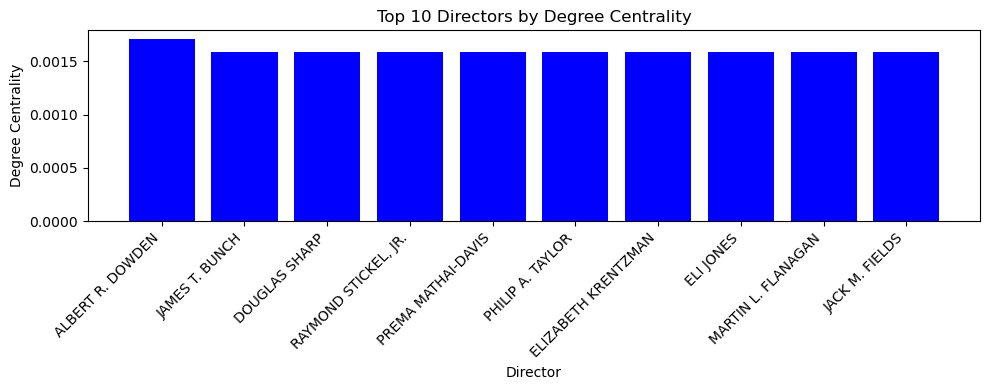

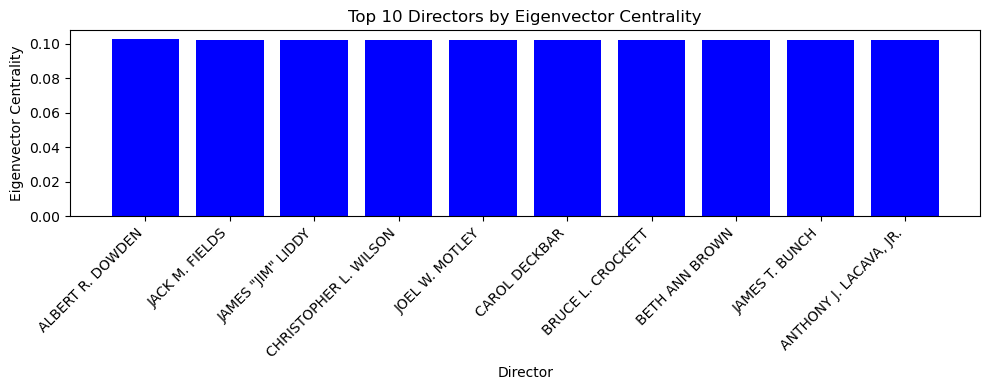

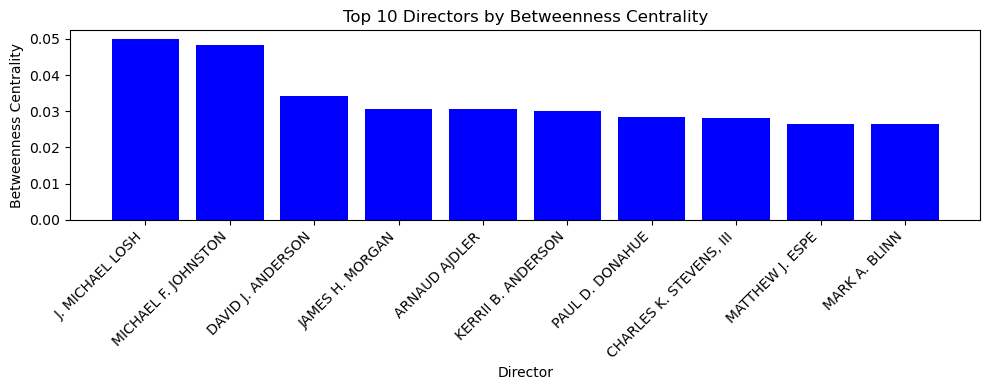

In [444]:
n = 10
for measure in ['degree', 'eigenvector', 'betweenness']:
    plt.figure(figsize=(10, 4))
    subset = people_df.sort_values(measure, ascending=False).head(n)
    plt.bar(subset.index, subset[measure], color='blue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Top {n} Directors by {measure.capitalize()} Centrality")
    plt.xlabel("Director")
    plt.ylabel(f"{measure.capitalize()} Centrality")
    plt.tight_layout()
    plt.show()

## 4. Code Repair.

<br> In this section, I will choose four parts of code old data scientist which are inadequate, where there is no proper explanition of the code
<br> or not documented properly the code and show alternative ways of codes.

<br> Original code :

In [ ]:
compensation_and_demographics_raw = pandas.read_csv('director-details.csv')
compensation_and_demographics_raw['NAME'] = compensation_and_demographics_raw.name.str.upper()

def most_common(series):
    mode_values = series.mode()
    if len(mode_values) > 0:
        return mode_values[0]
    return None
    
compensation_and_demographics = pandas.DataFrame({
    'age': compensation_and_demographics_raw.groupby('NAME').age.max(),
    'compensation': compensation_and_demographics_raw.groupby('NAME').compensation.sum(),
    'gender': compensation_and_demographics_raw.groupby('NAME').gender.agg(most_common)
})
compensation_and_demographics['log_compensation'] = (1 + compensation_and_demographics.compensation).map(math.log10)
compensation_and_demographics

<br> In this code there is 4 steps but no explanition of each step and I will try to explain some steps
<br> and show other possiblity to write the code.
<br> Original code :

In [ ]:
compensation_and_demographics_raw = pandas.read_csv('director-details.csv')
compensation_and_demographics_raw['NAME'] = compensation_and_demographics_raw.name.str.upper()

<br> This part of the code loads a csv file and in the second column,
<br> converse the name column to upperace and create a new column NAME.

<br> Original code : 

In [ ]:
def most_common(series):
    mode_values = series.mode()
    if len(mode_values) > 0:
        return mode_values[0]
    return None

<br> This function gets most frequent value from the pandas series and function returns the mode value of the column
<br> mode works perfectly if it is categorical column, if it is empty then return None.

In [ ]:
def most_common(series):
    mode_values = series.mode()
    return mode_values[0] if not mode_values.empty else None

<br> Both funtions goal is same but this was more optimized than original code, aslo second function returns
<br> the first one when there are multiple values have same frequency.

<br> Next part is creating group by director and aggregate
<br> Original code:

compensation_and_demographics = pandas.DataFrame({
    'age': compensation_and_demographics_raw.groupby('NAME').age.max(),
    'compensation': compensation_and_demographics_raw.groupby('NAME').compensation.sum(),
    'gender': compensation_and_demographics_raw.groupby('NAME').gender.agg(most_common)

<br> There is nothing wrong but there is no explanition of the code and code can optimized little bit
<br> by creating new variable for dataset groupby by "Name" because in original code groupby() repeated multiple times for the same group.

In [ ]:
grouped = compensation_and_demographics_raw.groupby('NAME')
compensation_and_demographics = pd.DataFrame({
    'age': grouped['age'].max(),
    'compensation': grouped['compensation'].sum(),
    'gender': grouped['gender'].agg(most_common)
})

<br> Here created variable grouped where used groupby() so it is not needed to use groupby for mulptly time,
<br> also this one removes redundacy.

<br> Original code : 

In [ ]:
compensation_and_demographics['log_compensation'] = (1 + compensation_and_demographics.compensation).map(math.log10)

<br> There is no any recommendation or error in this code, there was no explanation of the code.
<br> This part of the code computes compensation to log base 10 and adds 1 to avoid log(0).
<br> The reason of doing is to avoid skewness when creating graphs.

<br> Original code :

In [ ]:
people = []
companies = []
for company_name, director_name in zip(df.company_name, df.director_name):
    graph.add_edge(company_name, director_name)
    people.append(director_name)
    companies.append(company_name)

<br> There is no any recommendation for this part of the code, there was no explanation. 
<br> This part of the code builds a bipartite graph connecting companies to directors.

<br> Original code :

In [ ]:
biggest_connected_graph = graph.subgraph(list(networkx.connected_components(graph))[0])

<br> There is no any recommendation for this part of the code, there was no explanation. 
<br> This part of the code take the largest connected component of th e graph.

<br> Original code :

In [ ]:
centrality = pandas.DataFrame({
    'eigen': pandas.Series(networkx.eigenvector_centrality(biggest_connected_graph)),
    'degree': pandas.Series(networkx.degree_centrality(biggest_connected_graph)),
})


<br> There is no any recommendation for this part of the code, there was no explanation. 
<br> This part of the code computes eigenvector centrality and degree centrality for all nodes.

<br> In overall, in this part I mostly wrote explanation of the code because codes were not documented,
<br> also I added some comments in the first chapter where original code was presented.

## 5. Exploring additional features.

<br> In this chapter, I explore one more features from these dataset. Find average centrality by gender.

In [266]:
gender = people_df.groupby('gender')[['degree', 'eigenvector', 'betweenness']].mean()

In [452]:
gender

,degree,eigenvector,betweenness
gender,,,
female,0.000147,0.000535,0.000814
male,0.000148,0.000279,0.000995


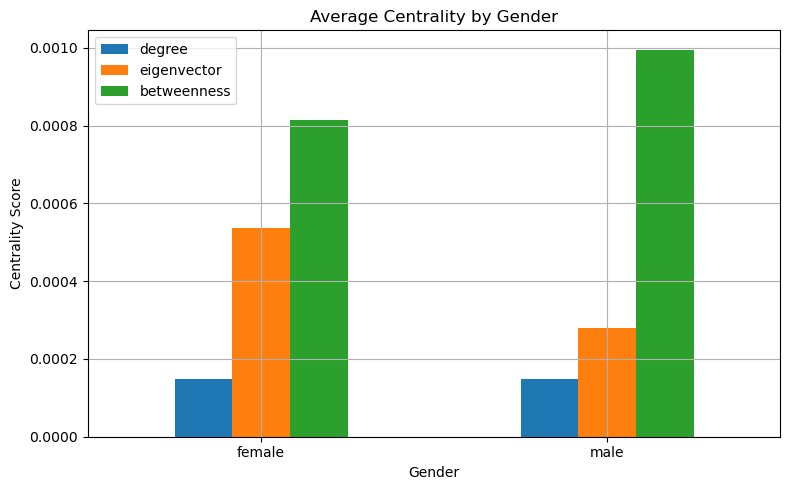

In [449]:
gender.plot(kind='bar', figsize=(8, 5), title='Average Centrality by Gender')
plt.ylabel("Centrality Score")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Complementary dataset.

<br> In this part I find additional dataset from Kaggle. This is not based on the directorships, it is based on the top companies based on their stock price and marketcap. Also country column is available so logically this kind dataset helps to identify the top companies which can buy the company based on the country of the which we are trying to sell. Because of this, I will try do centrality based on the companies which belong to the same country.
<br> Dataset link : https://www.kaggle.com/datasets/shiivvvaam/largest-companies-by-market-cap?resource=download
<br> Also dataset can be foun in repository. Dataset is about Top Global Companies by Market Capitalization. I researched the dataset in kaggle by searching top companies or companies based on the stock prices and I choose the dataset which was the gold medal dataset and more new uploaded dataset in kaggle.

In [290]:
df_kaggle = pd.read_csv("companiesmarketcap.csv")
df_kaggle

,Rank,Company Names,Company Code,Marketcap,Stock Price,Origin Flag,Country
0,1.0,Microsoft,MSFT,$3.033 T,$407.21,🇺🇸,USA
1,2.0,Apple,AAPL,$2.951 T,$190.92,🇺🇸,USA
2,3.0,Saudi Aramco,2222.SR,$2.026 T,$8.34,🇸🇦,S. Arabia
3,4.0,Alphabet (Google),GOOG,$1.909 T,$153.46,🇺🇸,USA
4,5.0,Amazon,AMZN,$1.653 T,$160.05,🇺🇸,USA
...,...,...,...,...,...,...,...
7983,7983.0,Energy Harbor,ENGH,NaN,NaN,🇺🇸,USA
7984,7984.0,Qiwi,QIWI.ME,NaN,$5.46,🇨🇾,Cyprus
7985,7985.0,X5 Retail Group,FIVE.ME,NaN,$25.17,🇳🇱,Netherlands
7986,7986.0,Rosseti,RSTI.ME,NaN,NaN,🇷🇺,Russia


In [303]:
df_kaggle.columns

Index(['Rank', 'Company Names', 'Company Code', 'Marketcap', 'Stock Price',
       'Origin Flag', 'Country'],
      dtype='object')

<br> There are 7 columns in this dataset.

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13347 entries, 0 to 13346
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   company_name         13347 non-null  object
 1   cikcode              13347 non-null  int64 
 2   director_name        13347 non-null  object
 3   software_background  13347 non-null  bool  
 4   start_date           13347 non-null  object
 5   end_date             13347 non-null  object
dtypes: bool(1), int64(1), object(4)
memory usage: 534.5+ KB


In [308]:
df.isna().sum()

company_name           0
cikcode                0
director_name          0
software_background    0
start_date             0
end_date               0
dtype: int64

<br> There is no missing values so dataset looks normal.

## 7. Refinement options.

<br> In this part I choose to work with (b) and (c) options where
<br> I have to work and implement with the dataset which I got from Kaggle. 
<br> Other option is write up ethics of this project.

### (b) Option :

<br> In this part, I find top 10 companies by using eigenvector centrality based on country network.

In [419]:
G = nx.Graph()

<br> Creating the graph.

In [396]:
for idx, row in df_kaggle.iterrows():
    company = row["Company Names"]
    G.add_node(company, country=row["Country"], market_cap=row["Marketcap"])

<br> This loop adds nodes with attributes.

In [416]:
grouped = df_kaggle.groupby("Country")["Company Names"].apply(list)
for company_list in grouped:
    n = len(company_list)
    if n > 1:
        for i in range(n - 1):
            for j in range(i + 1, n): 
                G.add_edge(company_list[i], company_list[j])

<br> This lopp add edges between companies from the same country. Only I have to comment that this loop take small group because when taking full dataset by each country and company it take very big time because of this I have to choose this method.

In [401]:
centrality = nx.eigenvector_centrality(G, max_iter=1000)

<br> Calculating eigenvector centrality.

In [410]:
nodes = sorted(centrality, key=centrality.get, reverse=True)[:10]
graph = G.subgraph(nodes)

<br> Getting top 10 companies by centrality.

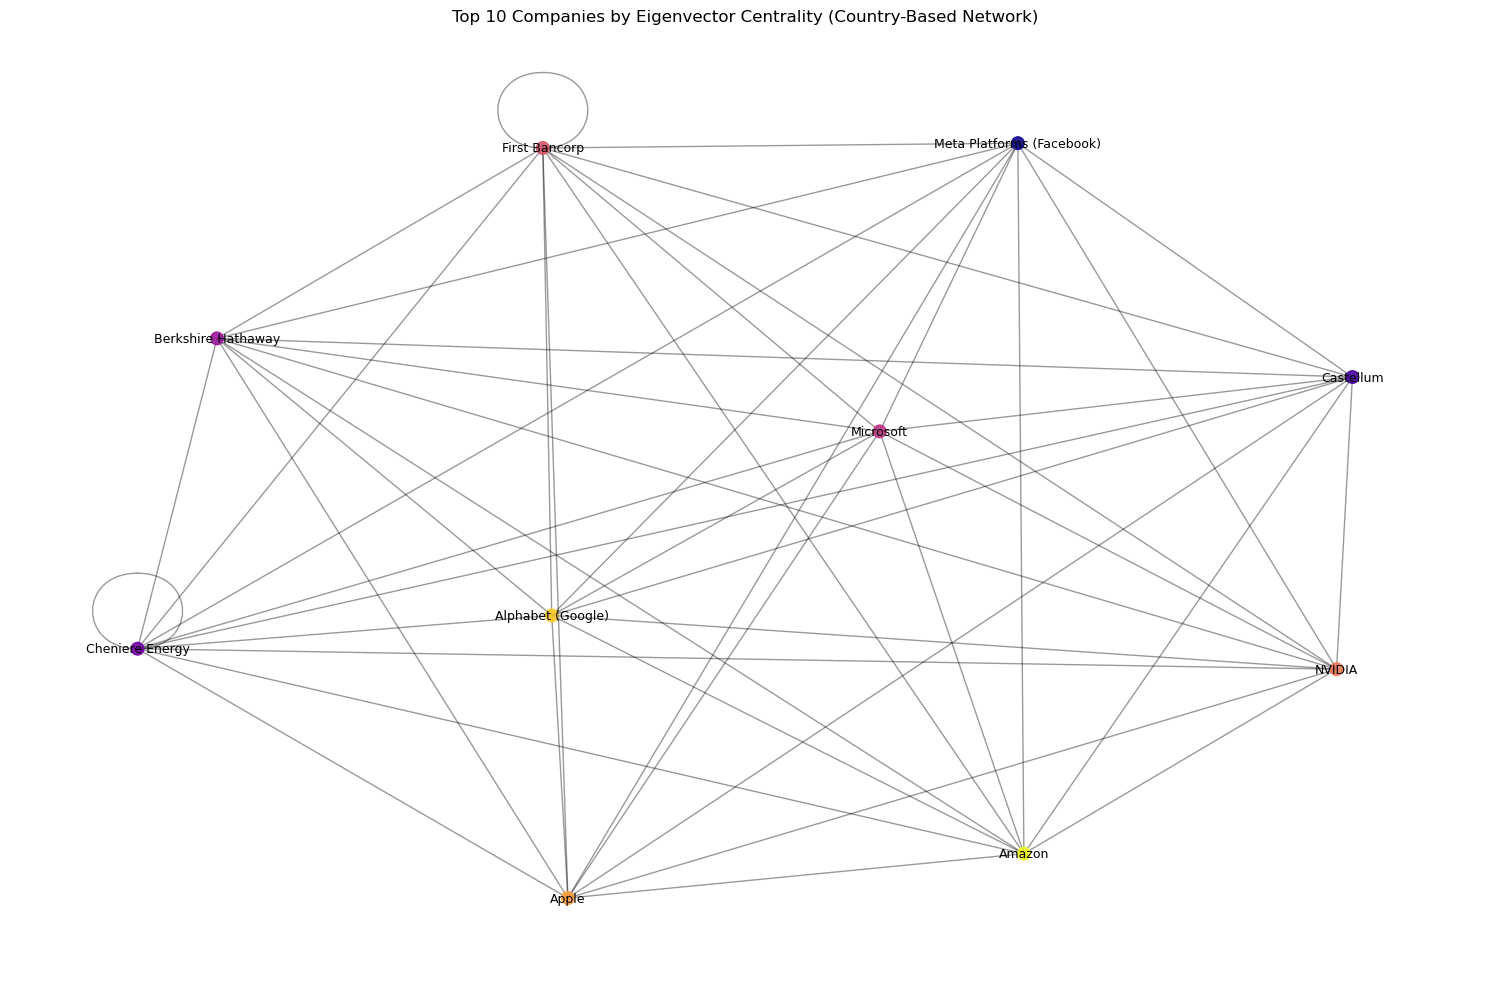

In [414]:
plt.figure(figsize=(15, 10))
p = nx.spring_layout(graph, seed=42)
node_s = [5000 * centrality[node] for node in graph.nodes()]
node_c = range(len(graph.nodes()))
nx.draw_networkx_nodes(graph, p, node_size=node_s, node_color=node_c, cmap=plt.cm.plasma, alpha=0.9)
nx.draw_networkx_edges(graph, p, alpha=0.4)
nx.draw_networkx_labels(graph, p, font_size=9)
plt.title("Top 10 Companies by Eigenvector Centrality (Country-Based Network)")
plt.axis("off")
plt.tight_layout()
plt.show()

### (c) Option :

<br> This project also introduces several ethical issues—both with software development practices and the use of corporate and individual network data.
<br> <b>Privacy and Consent :</b> 
<br> All dataset is publicly available, but still this project requires transparency and awareness of personal data of directorships.
<br> <b>Code Handover and Documentation Ethics : </b>
<br> Ethics of this project is that old Data Scietist worked started this project but did not leaved 
proper documented file and just left codes. Based on the ethics, it is totally wrong because every time when developer writes codes have to leave the comments for next technical person to continue the work on the project.

## 8. Conclusion

<br> In this project, I explored the network analysis of company and directos relationships using DEF 14A filings. First step was to understand and analyze the old code which was left by old data scientist and correct and code and well document the project. The main goal of this project is to find the director which can buy the company. In overall, the project demonstrated the network analysis in real public dataset and analyze the relationships of two datasets and integrate.